<a href="https://colab.research.google.com/github/jhalto/Machine-learning/blob/main/KNN_Data_mining_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn import tree

loading data

In [ ]:
iris_data= load_iris()
iris= pd.DataFrame(iris_data.data)
iris_targets= pd.DataFrame(iris_data.target)


In [ ]:
print("Features Name: ",iris_data.feature_names)

Features Name:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print("Target Name: ",iris_data.target_names)

Target Name:  ['setosa' 'versicolor' 'virginica']


In [ ]:
print("dataset shape: ",iris.shape)

dataset shape:  (150, 4)


In [ ]:
print(iris.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [ ]:
print(iris_targets.head())

   0
0  0
1  0
2  0
3  0
4  0


In [ ]:
X = iris_data.data
Y = iris_data.target

spilitting

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size=.2,random_state=42)

decision tree

In [ ]:
DT= DecisionTreeClassifier(criterion='entropy')

#fitting the training data
DT.fit(X_train,y_train)
#pridiction
Y_pred = DT.predict(X_test)

In [ ]:
print("accuracy : ",accuracy_score(y_test,Y_pred))

accuracy :  1.0


In [ ]:
cm= np.array(confusion_matrix(y_test,Y_pred))

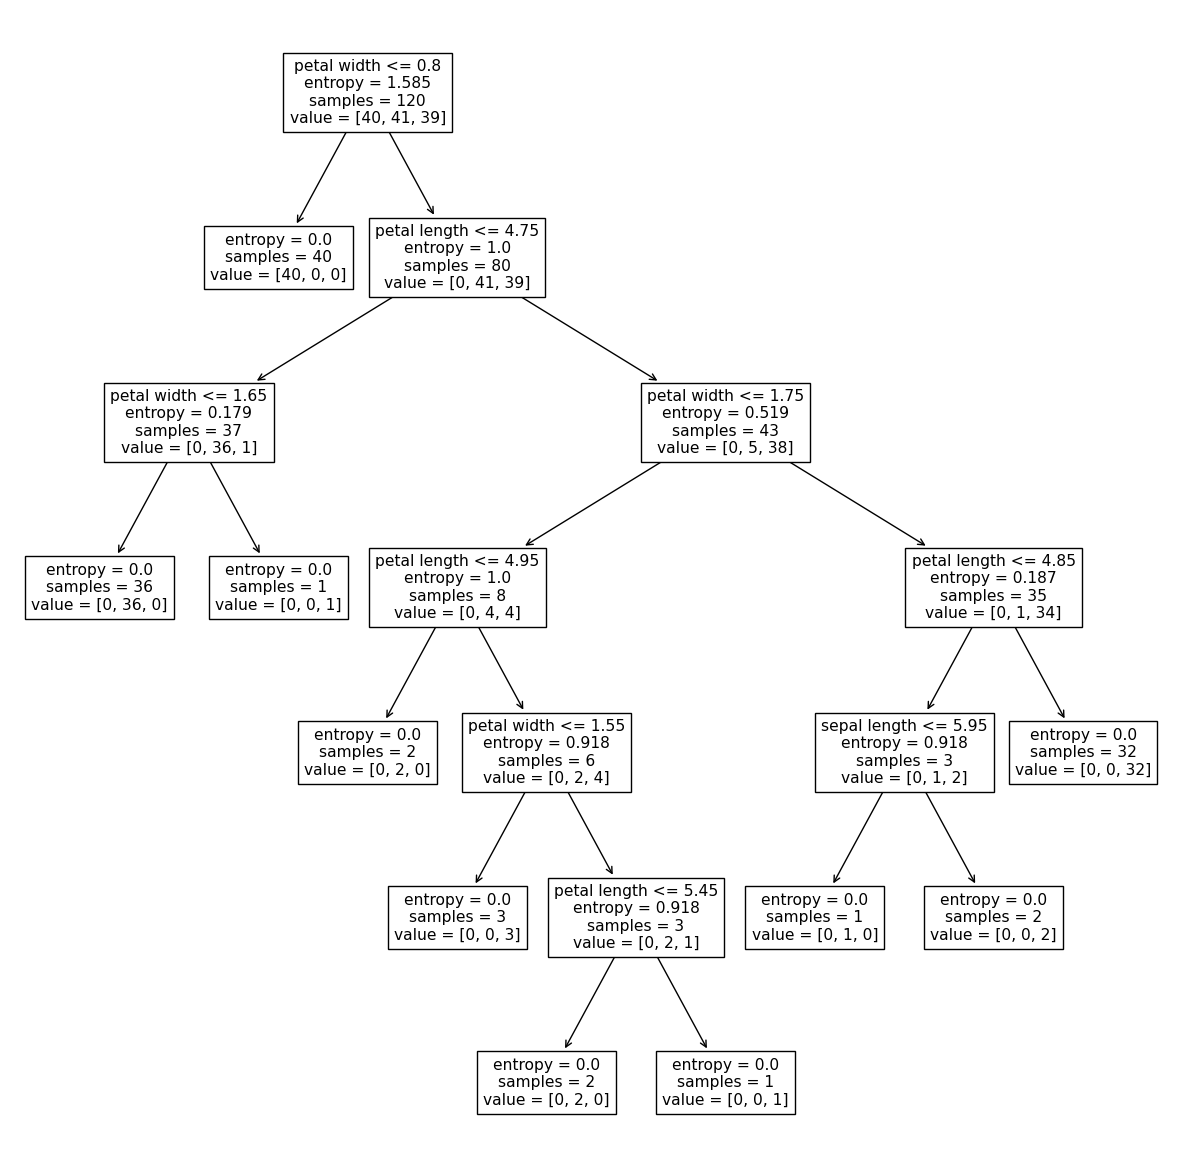

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15)) #figsize value changes the size of plot
tree.plot_tree(DT,ax=ax,feature_names=['sepal length','sepal width','petal length','petal width'])
plt.show()

In [ ]:
#Knn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
from sklearn.metrics import confusion_matrix
#Accuray of the model
print("Accuracy:", accuracy_score(y_test, Y_pred))
print(confusion_matrix(y_test, Y_pred))

Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.03333333333333333
0.0
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.03333333333333333
0.06666666666666667
0.03333333333333333
0.03333333333333333


Text(0, 0.5, 'Mean Error')

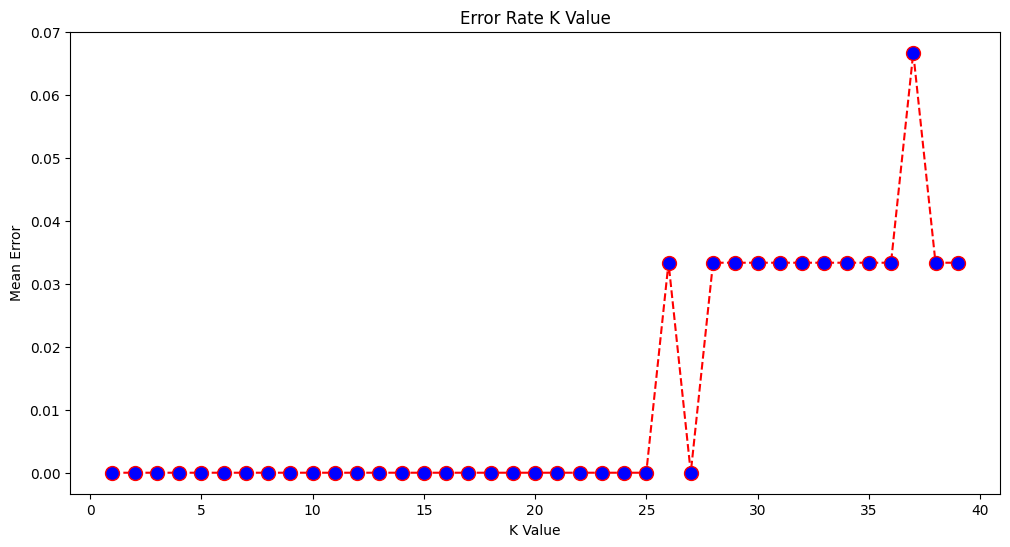

In [ ]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))
  print(np.mean(pred_i != y_test))
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')